In [34]:
# 데이터 구성 : Series, DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib


#데이터 scaling
from sklearn.preprocessing import StandardScaler

# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier

# 분류 RandomForest
from sklearn.ensemble import RandomForestClassifier

# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# 분류 NN(MLPClassfier)
from sklearn.neural_network import MLPClassifier


#모델 성능 평가: precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,auc





In [35]:
#데이터 구성하기
df_raw = pd.read_csv("HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [36]:
# 결측치 확인
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [37]:
# fillna : 결측치를 채우는 함수
# JOB 변수의 결측치는 Other로 입력, inplace : fillna 함수 적용 후 ds_hmeq 데이터에 저장, False면 저장 안함
df_raw["JOB"].fillna("Other", inplace = True)

In [38]:
# 숫자형 변수의 결측치는 해당 변수의 평균값 입력 : ds_hmeq.mean() 각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace = True)

C:\Users\user\AppData\Local\Temp/ipykernel_15260/1074707444.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(), inplace = True)


In [39]:
# get_dummies : 데이터 문자형 변수에 대한 더미변수 생성
df_raw_dummy = pd.get_dummies(df_raw)

# 더미변수 생성된 데이터의 상위 5개 row확인
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [40]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["BAD"]

# 데이터 분할 train_test_split(X:설명변수, Y:목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                test_size=0.3, random_state = 1234)
print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :", df_train_x.shape, "Test", df_test_x.shape)

분할 전 설명변수 데이터 : (3748, 18)
분할 후 설명변수 데이터 : (2623, 18) Test (1125, 18)


In [41]:
# 설명변수, 목표변수 데이터 지정
df_raw_x = df_raw_dummy.drop('BAD', axis = 1, inplace = False)
df_raw_y = df_raw_dummy['BAD']

# 데이터 분할 train_test_split
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape)) 
print("train data Y size : {}".format(df_train_y.shape)) 
print("test data x size : {}".format(df_test_x.shape)) 
print("test data Y size : {}".format(df_test_y.shape))


#분석 모델 
model = ["DecisionTree", "RandomForest", "GradientBoosting", "NeuralNet"] 

# 정확도 저장 
train_accuracy = []; test_accuracy = [] 
# auc score 저장 
model_auc = []

# Precision, Recall score 저장 
model_precision = []; model_recall = [] 

# f1 score 저장 
model_f1_score = []

train data X size : (2623, 18)
train data Y size : (2623,)
test data x size : (1125, 18)
test data Y size : (1125,)


In [42]:
# 모델 생성
dt_model =DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 30)
dt_model.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(dt_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

# 예측값
y_pred = dt_model.predict(df_test_x)

# roc_curve(실제값, 예측값)
# fpr=FP/(FP+TN) : 거짓 양성 비율
# tpr = TP/(TP+/FN) : 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# save auc 
model_auc.append(roc_auc)


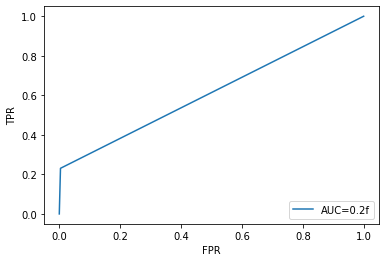

In [45]:
# roc curve 그리기, label에 auc표시(소수점 2자리)
plt.plot(fpr, tpr, label ="AUC=0.2f"% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [48]:
#precision, recall score
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

#f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

In [49]:
rf_model = RandomForestClassifier(min_samples_leaf = 20, max_depth = 4, n_estimators = 100, random_state = 1234)
rf_model.fit(df_train_x, df_train_y)

train_accuracy.append(rf_model.score(df_train_x, df_train_y))
test_accuracy.append(rf_model.score(df_test_x, df_test_y))

y_pred = rf_model.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

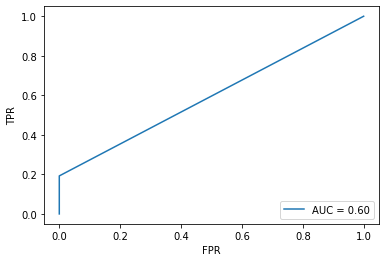

In [50]:
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [51]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

In [52]:
# 모델 생성
gb_final = GradientBoostingClassifier(min_samples_leaf = 10, max_depth = 4, n_estimators = 100,
                                      learning_rate = 1, random_state = 1234)
gb_final.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(gb_final.score(df_train_x, df_train_y))

# test 정확도
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

# 예측값
y_pred = gb_final.predict(df_test_x)

# roc_curve(실제값, 예측값), fpr = FP/(FP+TN) : 거짓 양성 비율, tpr = TP/(TP+FN) : 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

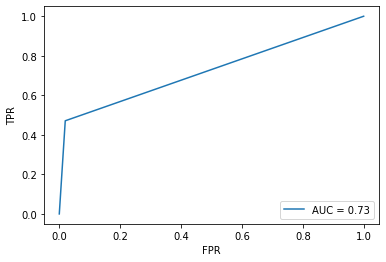

In [53]:
# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label = "AUC = %0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

In [54]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

In [58]:
# 변수명 저장
v_feature_names = df_train_x.columns

# StandardScaler 적용
scaler =StandardScaler()
df_scaled =scaler.fit_transform(df_raw_x)
df_scaled =pd.DataFrame(df_scaled, columns=v_feature_names)

# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("train data Y size : {}".format(df_scaled_train_x.shape))

train data X size : (2623, 18)
train data Y size : (2623, 18)


In [61]:
# 모델 생성
nn_model = MLPClassifier(hidden_layer_sizes = (80,80), activation = "relu", solver = "adam", random_state = 1234)
nn_model.fit(df_scaled_train_x,df_train_y)

# train 정확도
train_accuracy.append(nn_model.score(df_scaled_train_x, df_train_y))
# test 정확도
test_accuracy.append(nn_model.score(df_scaled_test_x, df_test_y))

# 예측값
y_pred = nn_model.predict(df_scaled_test_x)

# roc_curve(실제값, 예측값), fpr = FP/(FP+TN): 거짓 양성 비율, tpr = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr,tpr)

# auc 저장
model_auc.append(roc_auc)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


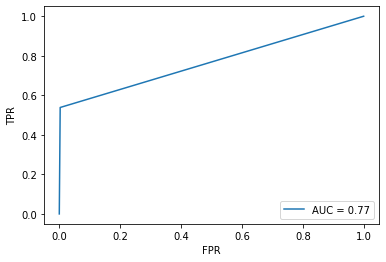

In [62]:

# roc curve 그리기, label에 auc표시(소수점 2자리)
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()


In [64]:
#precision, recall score
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

#f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))



In [65]:
#모델별 평가 결과
df_eval = pd.DataFrame(index=model)
df_eval["TrainAccuracy"] = train_accuracy ; df_eval["TestAccuracy"] = test_accuracy
df_eval["AUC"] = model_auc
df_eval["Precision"] = model_precision; df_eval["Recall"] = model_recall
df_eval["F1Score"] = model_f1_score
df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
DecisionTree,0.930,0.925,0.613,0.857,0.231,0.364
RandomForest,0.927,0.925,0.596,1.000,0.192,0.323
GradientBoosting,0.975,0.933,0.726,0.710,0.471,0.566
NeuralNet,1.000,0.955,0.768,0.949,0.538,0.687


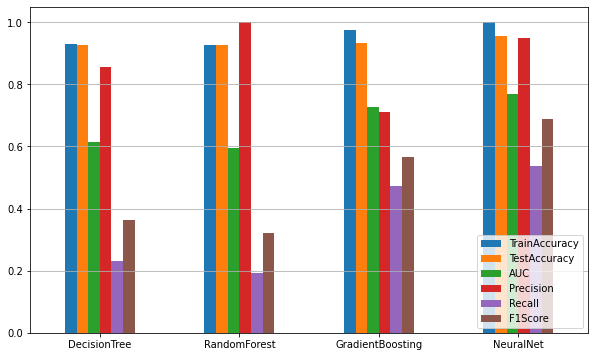

In [66]:
#모델별 평가 지표 확인
df_eval.plot.bar(rot=0,figsize=(10,6))
plt.legend(loc="lower right")
plt.grid(axis="y")